##### Mastering xgboost using affairs dataset : https://www.kaggle.com/datasets/clarkchong/fairs-affairs-dataset/data?select=Affairs.csv

In [10]:
# import libraries
import pandas as pd
import xgboost as xgb
import shap
import numpy as np
from sklearn.metrics import confusion_matrix

In [3]:
data = pd.read_csv("Affairs.csv")
data

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.00,no,3,18,7,4
1,5,0,female,27.0,4.00,no,4,14,6,4
2,11,0,female,32.0,15.00,yes,1,12,1,4
3,16,0,male,57.0,15.00,yes,5,18,6,5
4,23,0,male,22.0,0.75,no,2,17,6,3
...,...,...,...,...,...,...,...,...,...,...
596,1938,1,male,22.0,1.50,yes,1,12,2,5
597,1941,7,female,32.0,10.00,yes,2,18,5,4
598,1954,2,male,32.0,10.00,yes,2,17,6,5
599,1959,2,male,22.0,7.00,yes,3,18,6,2


In [4]:
data.dtypes

Unnamed: 0         int64
affairs            int64
gender            object
age              float64
yearsmarried     float64
children          object
religiousness      int64
education          int64
occupation         int64
rating             int64
dtype: object

In [5]:
# transform occupation into categorical
data['occupation'] = data.occupation.astype('category')

In [6]:
data.dtypes

Unnamed: 0          int64
affairs             int64
gender             object
age               float64
yearsmarried      float64
children           object
religiousness       int64
education           int64
occupation       category
rating              int64
dtype: object

In [19]:
# isolate x and y
X = data.iloc[:, 2:]
y = data.iloc[:, 1]

In [20]:
X

,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,male,37.0,10.00,no,3,18,7,4
1,female,27.0,4.00,no,4,14,6,4
2,female,32.0,15.00,yes,1,12,1,4
3,male,57.0,15.00,yes,5,18,6,5
4,male,22.0,0.75,no,2,17,6,3
...,...,...,...,...,...,...,...,...
596,male,22.0,1.50,yes,1,12,2,5
597,female,32.0,10.00,yes,2,18,5,4
598,male,32.0,10.00,yes,2,17,6,5
599,male,22.0,7.00,yes,3,18,6,2


In [21]:
y

0      0
1      0
2      0
3      0
4      0
      ..
596    1
597    7
598    2
599    2
600    1
Name: affairs, Length: 601, dtype: int64

In [22]:
# transform the y variable into binary
y = np.where(y > 0, 1, 0)

In [23]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [24]:
# transform categorical into dummies
X = pd.get_dummies(data = X,
                  drop_first=True,
                  dtype=int)
X

,age,yearsmarried,religiousness,education,rating,gender_male,children_yes,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7
0,37.0,10.00,3,18,4,1,0,0,0,0,0,0,1
1,27.0,4.00,4,14,4,0,0,0,0,0,0,1,0
2,32.0,15.00,1,12,4,0,1,0,0,0,0,0,0
3,57.0,15.00,5,18,5,1,1,0,0,0,0,1,0
4,22.0,0.75,2,17,3,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,22.0,1.50,1,12,5,1,1,1,0,0,0,0,0
597,32.0,10.00,2,18,4,0,1,0,0,0,1,0,0
598,32.0,10.00,2,17,5,1,1,0,0,0,0,1,0
599,22.0,7.00,3,18,2,1,1,0,0,0,0,1,0


In [25]:
# transform dataset into training and test set 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2, 
                                                   random_state = 1502)

In [27]:
# Create XgBoost Matrices
train = xgb.DMatrix(x_train, label = y_train)
test = xgb.DMatrix(x_test, label = y_test)

In [28]:
# tune the parameters
parameters = {'learning_rate': 0.3, 
             'max_depth':6,
             'colsample_bytree': 1,
             'subsample': 1,
             'min_child_weight': 1,
             'gamma': 0,
             'random_state': 1502,
             'eval_metric': 'auc',
             'objective': 'binary:logistic'}

In [29]:
# run xgboost
model = xgb.train(params = parameters,
                 dtrain = train,
                 num_boost_round=10,
                 evals = [(test, "Yes")])

[0]	Yes-auc:0.73529
[1]	Yes-auc:0.74730
[2]	Yes-auc:0.75490
[3]	Yes-auc:0.75541
[4]	Yes-auc:0.75101
[5]	Yes-auc:0.74527
[6]	Yes-auc:0.75203
[7]	Yes-auc:0.75017
[8]	Yes-auc:0.74645
[9]	Yes-auc:0.74848


In [30]:
# predictions
predictions = model.predict(test)
predictions

array([0.09975313, 0.48828185, 0.15227982, 0.10029943, 0.5746409 ,
       0.16722947, 0.31354278, 0.4656472 , 0.7962306 , 0.04652839,
       0.29693633, 0.19147232, 0.13762765, 0.0328357 , 0.07673132,
       0.09134721, 0.29116145, 0.4293073 , 0.13686347, 0.13690744,
       0.13221592, 0.32224086, 0.24750002, 0.507007  , 0.36867455,
       0.31832707, 0.12899914, 0.15806305, 0.16994658, 0.2225908 ,
       0.0336738 , 0.11101479, 0.1357827 , 0.18593441, 0.41668308,
       0.38449934, 0.07513189, 0.22552428, 0.46346807, 0.35782123,
       0.5145871 , 0.6110565 , 0.23477504, 0.10319442, 0.20927158,
       0.69399035, 0.14289749, 0.15781152, 0.2203754 , 0.1405475 ,
       0.66737205, 0.23659387, 0.13313094, 0.11136606, 0.31249356,
       0.24798305, 0.04366623, 0.5777362 , 0.10140518, 0.13762765,
       0.27382553, 0.11725152, 0.35177025, 0.3939086 , 0.339283  ,
       0.16388728, 0.18716584, 0.05119219, 0.27263647, 0.42295778,
       0.090138  , 0.24592853, 0.21144727, 0.25979173, 0.07819

In [31]:
predictions = np.where(predictions > 0.5, 1, 0)
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
#confusion matrix
confusion_matrix = confusion_matrix(y_test, predictions)

array([[79,  8],
       [27,  7]])

In [33]:
print(confusion_matrix)

[[79  8]
 [27  7]]


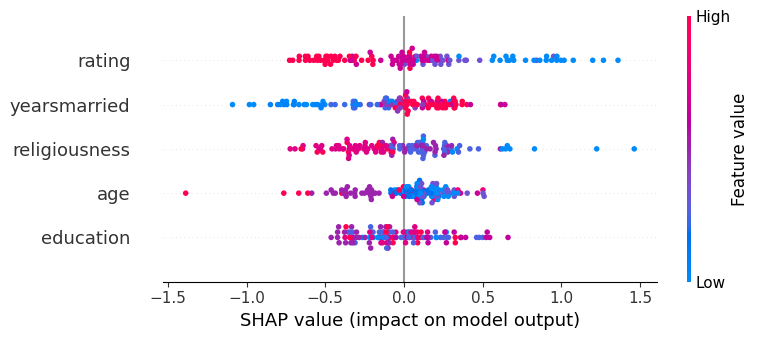

In [36]:
# shap values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values,
                 x_test,
                 max_display=5)